# Exponential

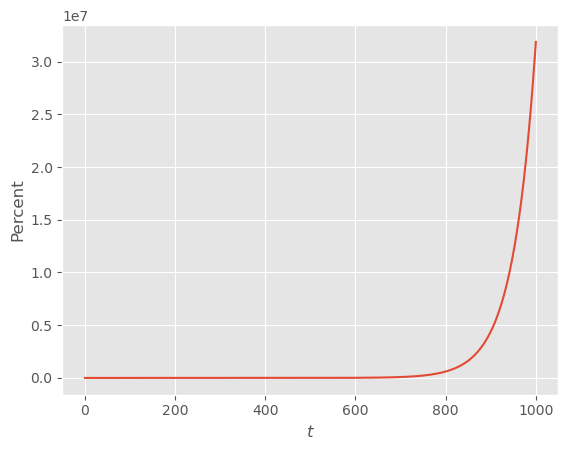

In [14]:
import matplotlib
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

def exp():
    deltaT = 0.01
    lamb = 2
    i_list = []
    i0 = 0.08 # 初始有的人感染8% 
    i_list.append(i0) # 输入i0
    Tot_Time = 10
    TotStep = int(Tot_Time/deltaT) # 表示取整int
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT
        i_list.append(i_new)
    plt.plot(i_list)
    plt.xlabel(r"$t$") #加横坐标label 
    plt.ylabel('Percent') #加纵坐标label
    plt.show()
exp()

# SI Model

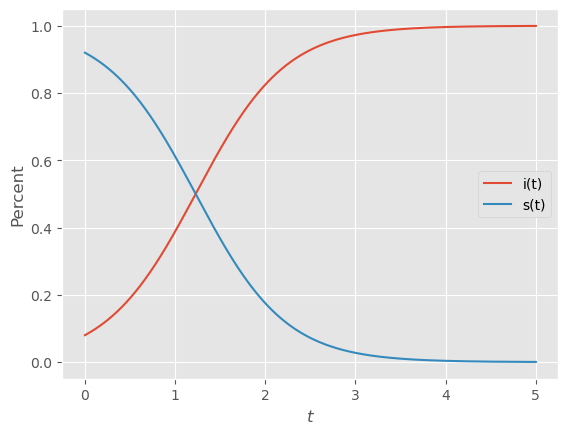

In [15]:
def SI():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    i_list = []
    s_list = []
    i0 = 0.08; # 初始有的人感染8% 
    i_list.append(i0) 
    s_list.append(1 - i0) 
    Tot_Time =5
    TotStep = int(Tot_Time/deltaT)
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT * s_list[-1]
        i_list.append(i_new)
        s_list.append(1- i_new)
    Time = [i * deltaT for i in range(TotStep + 1)]
    plt.plot(Time,i_list,label = 'i(t)') # 作i(t)图像 
    plt.plot(Time,s_list,label = 's(t)') # 作s(t)图像 
    plt.xlabel(r"$t$") # 加横坐标label 
    plt.ylabel('Percent') # 加纵坐标label 
    plt.legend() # 绘图
SI()

# SIS Model

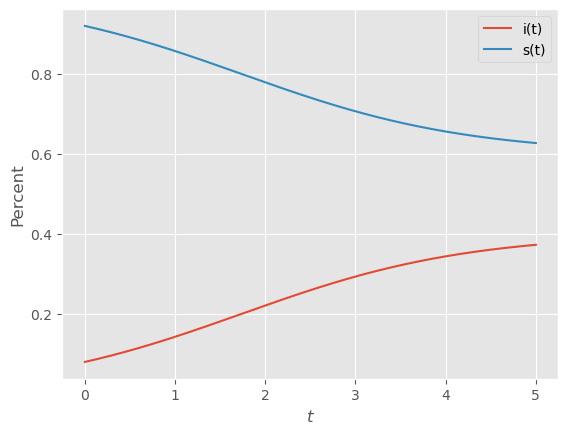

In [9]:
def SIS():
    # 输入计算参数
    deltaT = 0.01
    lamb = 2
    miu = 1.2
    i_list = []
    s_list = []
    i0 = 0.08; # 初始有的人感染8% 
    i_list.append(i0) 
    s_list.append(1 - i0) 
    Tot_Time =5
    TotStep = int(Tot_Time/deltaT)
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * i_list[-1] * deltaT * s_list[-1] - miu * i_list[-1]* deltaT
        i_list.append(i_new)
        s_list.append(1- i_new)
    Time = [i * deltaT for i in range(TotStep + 1)]
    plt.plot(Time,i_list,label = 'i(t)') # 作i(t)图像 
    plt.plot(Time,s_list,label = 's(t)') # 作s(t)图像 
    plt.xlabel(r"$t$") # 加横坐标label 
    plt.ylabel('Percent') # 加纵坐标label 
    plt.legend() # 绘图
SIS()

# SIR Model

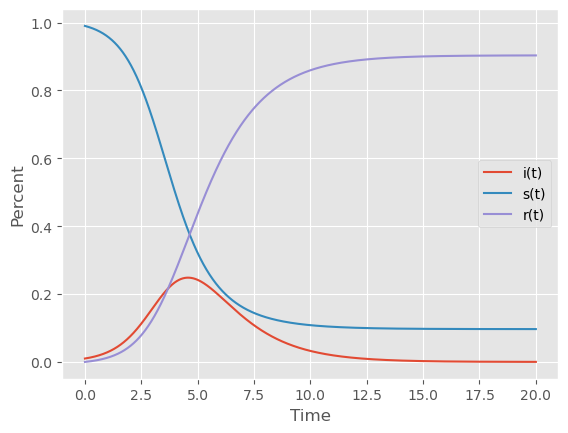

In [16]:
def SIR():
    i0 = 0.01; # 初始有的人感染1%
    r0 = 0; # 初始没有人免疫
    lamb = 1.8 # 参数
    s0 = 1- i0; # 初始未感染人数比例
    mu = 0.7; # 参数
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    r_list.append(r0) # 输入r0
    TotTime = 20
    TimeStep = 0.01
    TotStep = int(TotTime/TimeStep)
    for i in range(TotStep):
        i_new = i_list[-1] + lamb * s_list[-1] * i_list[-1]*TimeStep - mu * i_list[-1] * TimeStep
        s_new = s_list[-1] - lamb * s_list[-1] * i_list[-1]*TimeStep
        i_list.append(i_new) # 输入，继续循环i_new 
        s_list.append(s_new) # 输入，继续循环s_new 
        r_list.append(1-i_new-s_new)
    Time = [TimeStep * i for i in range(TotStep+1)]
    plt.plot(Time,i_list) # i(t) 
    plt.plot(Time,s_list) # s(t) 
    plt.plot(Time,r_list) # r(t) 
    plt.xlabel("Time") # 加横坐标label 
    plt.ylabel("Percent") # 加纵坐标label 
    plt.legend(["i(t)","s(t)","r(t)"]) # 绘图
SIR()

# SIRS Model (Percentage)

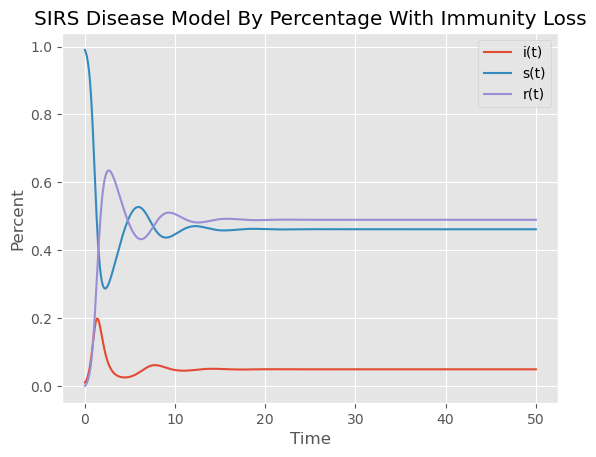

In [102]:
def SIRS():
    i0 = 0.01 # 初始有的人感染1%
    r0 = 0 # 初始没有人免疫
    s0 = 1 - i0 - r0 # 初始未感染人数比例
    lamb = 6.5 # 参数
    mu = 3 # 参数
    loss = 0.3 # 参数
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    r_list.append(r0) # 输入r0
    TotTime = 50
    dt = 0.01
    TotStep = int(TotTime/dt)
    for i in range(TotStep):
        s_new = s_list[-1] + (loss * r_list[-1] - lamb * s_list[-1] * i_list[-1]) * dt
        i_new = i_list[-1] + (lamb * s_list[-1] * i_list[-1] - mu * i_list[-1]) * dt
        r_new = r_list[-1] + (mu * i_list[-1] - loss * r_list[-1]) * dt
        s_list.append(s_new)
        i_list.append(i_new)
        r_list.append(r_new)

    Time = [dt * i for i in range(TotStep+1)]
    plt.plot(Time,i_list) # i(t) 
    plt.plot(Time,s_list) # s(t) 
    plt.plot(Time,r_list) # r(t) 
    plt.xlabel("Time") # 加横坐标label 
    plt.ylabel("Percent") # 加纵坐标label 
    plt.legend(["i(t)","s(t)","r(t)"]) # 绘图
    plt.title('SIRS Disease Model By Percentage With Immunity Loss')
SIRS()

# SIRS Model (Population)

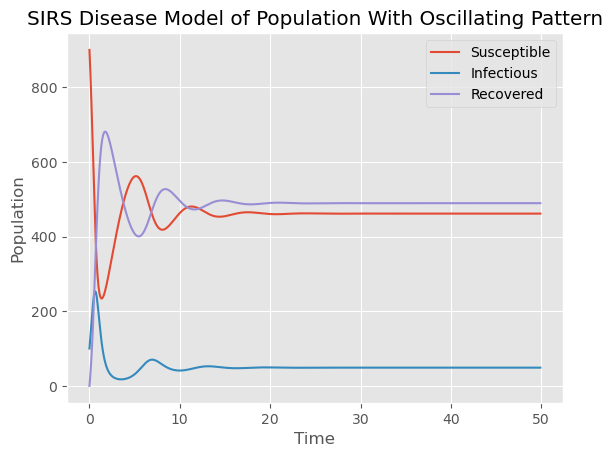

In [92]:
import numpy as np

# Parameters
beta = 6.5   # Transmission rate
gamma = 3  # Recovery rate
delta = 0.3  # Loss of immunity rate
dt = 0.1     # Time step
T = 50       # Total simulation time

# Initial conditions
S = 900    # Initial number of susceptible individuals
I = 100    # Initial number of infectious individuals
R = 0      # Initial number of recovered individuals

# Initialize lists to store population counts over time
time = [0]
susceptible = [S]
infectious = [I]
recovered = [R]

# Simulation loop
for t in np.arange(dt, T, dt):
    # Compute the rates of change
    dS = -beta * S * I / (S + I + R) + delta * R
    dI = beta * S * I / (S + I + R) - gamma * I
    dR = gamma * I - delta * R

    # Update the population counts using Euler's method
    S += dS * dt
    I += dI * dt
    R += dR * dt

    # Append current population counts to the lists
    time.append(t)
    susceptible.append(S)
    infectious.append(I)
    recovered.append(R)

# Plot the results
plt.plot(time, susceptible, label='Susceptible')
plt.plot(time, infectious, label='Infectious')
plt.plot(time, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('SIRS Disease Model of Population With Oscillating Pattern')
plt.show()


# SIRS Model With Binomial Noise (Population)

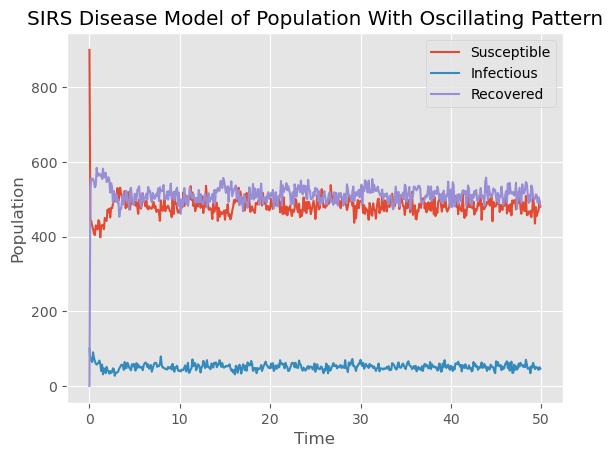

In [101]:
import numpy as np

# Parameters
beta = 6.5   # Transmission rate
gamma = 3  # Recovery rate
delta = 0.3  # Loss of immunity rate
dt = 0.1     # Time step
T = 50       # Total simulation time

# Initial conditions
S = 900    # Initial number of susceptible individuals
I = 100    # Initial number of infectious individuals
R = 0      # Initial number of recovered individuals

# Initialize lists to store population counts over time
time = [0]
susceptible = [S]
infectious = [I]
recovered = [R]

# Simulation loop
for t in np.arange(dt, T, dt):
    # Compute the rates of change
    dS = -beta * S * I / (S + I + R) + delta * R
    dI = beta * S * I / (S + I + R) - gamma * I
    dR = gamma * I - delta * R

    # Update the population counts using Euler's method
    new_S += dS * dt
    new_I += dI * dt
    new_R += dR * dt
    
    S = np.random.binomial(N, new_S/N)
    I = np.random.binomial(N, new_I/N)
    R = np.random.binomial(N, new_R/N)

    # Append current population counts to the lists
    time.append(t)
    susceptible.append(S)
    infectious.append(I)
    recovered.append(R)

# Plot the results
plt.plot(time, susceptible, label='Susceptible')
plt.plot(time, infectious, label='Infectious')
plt.plot(time, recovered, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('SIRS Disease Model of Population With Oscillating Pattern')
plt.show()

# SIRS Model With No Immunity Loss Parameter (Percentage)

In this model, the immunity loss parameter is removed. After each time interval, the population that was recovered was all exposed to the disease. Thus, the (loss * r_list[-1]) term is replaced by (lamb * r_list[-1] * i_list[-1]).

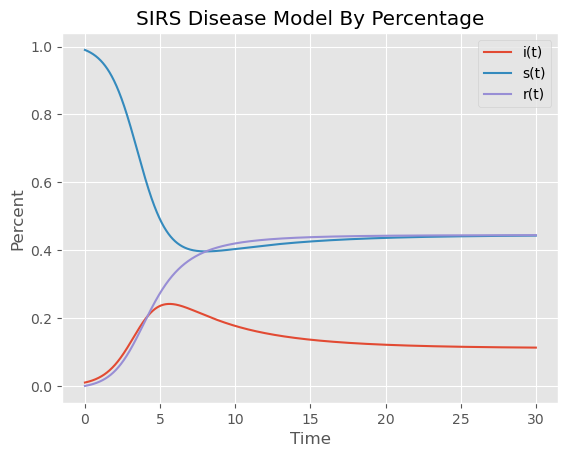

In [103]:
def SIRS():
    i0 = 0.01 # 初始有的人感染1%
    r0 = 0 # 初始没有人免疫
    s0 = 1 - i0 - r0 # 初始未感染人数比例
    lamb = 1.8 # 参数
    mu = 0.8 # 参数
    i_list = []
    s_list = []
    r_list = []
    i_list.append(i0) # 输入i0
    s_list.append(s0) # 输入s0
    r_list.append(r0) # 输入r0
    TotTime = 30
    dt = 0.01
    TotStep = int(TotTime/dt)
    for i in range(TotStep):
        s_new = s_list[-1] + (lamb * r_list[-1] * i_list[-1] - lamb * s_list[-1] * i_list[-1]) * dt
        i_new = i_list[-1] + (lamb * s_list[-1] * i_list[-1] - mu * i_list[-1]) * dt
        r_new = r_list[-1] + (mu * i_list[-1] - lamb * r_list[-1] * i_list[-1]) * dt
        s_list.append(s_new)
        i_list.append(i_new)
        r_list.append(r_new)
    Time = [dt * i for i in range(TotStep+1)]
    plt.plot(Time,i_list) # i(t) 
    plt.plot(Time,s_list) # s(t) 
    plt.plot(Time,r_list) # r(t) 
    plt.xlabel("Time") # 加横坐标label 
    plt.ylabel("Percent") # 加纵坐标label 
    plt.legend(["i(t)","s(t)","r(t)"]) # 绘图
    plt.title('SIRS Disease Model By Percentage')
SIRS()

A finding is that as the infected population stablize, it also stablizes the suspect and recovered populations quickly, as the immunity loss is dependent on the infected population. Thus, The three curves more quickly approaches a constant value.